<h1>SUPERVISED MACHINE LEARNING</h1>

<h2><strong>HOUSE PRICES</strong></h2>

<h2><strong>CLASSIFICATION</strong></h2>

<h2>INTUITION MODEL- 1st ITERATION</h2>

Numerical features

In [5]:
import pandas as pd
import numpy as np

In [6]:
house= pd.read_csv("housing-classification-iter6.csv")

In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   Expensive      1460 non-null   int64  
 10  MSZoning       1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Heating        1460 non-null   object 
 13  Street         1460 non-null   object 
 14  CentralAir     1460 non-null   object 
 15  Foundation     1460 non-null   object 
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  BsmtQual

In [10]:
house=house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','Expensive','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]

In [19]:
house

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,PoolArea,GarageCars,Expensive,MSZoning,Condition1,HeatingQC,Street,CentralAir,Utilities,Neighborhood,OverallCond
0,8450,65.0,856,3,0,2,0,RL,Norm,Ex,Pave,Y,AllPub,CollgCr,5
1,9600,80.0,1262,3,0,2,0,RL,Feedr,Ex,Pave,Y,AllPub,Veenker,8
2,11250,68.0,920,3,0,2,0,RL,Norm,Ex,Pave,Y,AllPub,CollgCr,5
3,9550,60.0,756,3,0,3,0,RL,Norm,Gd,Pave,Y,AllPub,Crawfor,5
4,14260,84.0,1145,4,0,3,0,RL,Norm,Ex,Pave,Y,AllPub,NoRidge,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,0,2,0,RL,Norm,Ex,Pave,Y,AllPub,Gilbert,5
1456,13175,85.0,1542,3,0,2,0,RL,Norm,TA,Pave,Y,AllPub,NWAmes,6
1457,9042,66.0,1152,4,0,1,1,RL,Norm,Ex,Pave,Y,AllPub,Crawfor,9
1458,9717,68.0,1078,2,0,1,0,RL,Norm,Gd,Pave,Y,AllPub,NAmes,6


In [13]:
house.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
PoolArea          0
GarageCars        0
Expensive         0
MSZoning          0
Condition1        0
HeatingQC         0
Street            0
CentralAir        0
Utilities         0
Neighborhood      0
OverallCond       0
dtype: int64

In [14]:
house.duplicated().sum()

15

In [15]:
house.drop_duplicates(inplace=True)

<strong>Dummy model</strong>

In [16]:
def dummy_model(condition):
    if condition <= 7:
        return 0
    elif condition >=8:
        return 1
    


Split the dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = house.drop(columns=['Expensive'])
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [19]:
X_train['preds'] = [dummy_model(condition) for condition in X_train['OverallCond']]

In [20]:
X_test['preds'] = [dummy_model(condition) for condition in X_test['OverallCond']]

In [21]:
(
pd.DataFrame({
    'expensive': y_train,
    'preds':[dummy_model(condition) for condition in X_train['OverallCond']]
    })
.assign(check = lambda x : x['expensive'] == x['preds'])['check']
.sum()
)/ len(y_train)

0.8013029315960912

In [22]:
acc_1st = (
pd.DataFrame({
    'expensive': y_test,
    'preds':[dummy_model(condition) for condition in X_test['OverallCond']]
    })
.assign(check = lambda x : x['expensive'] == x['preds'])['check']
.sum()
)/ len(y_test)

In [23]:
acc_1st

0.8018433179723502

In [24]:

check_df=pd.DataFrame({
    'expensive': y_train,
    'preds':[dummy_model(condition) for condition in X_train['OverallCond']]
    }).assign(check = lambda x : x['expensive'] == x['preds'])['check'].reset_index()


In [25]:
check_df.groupby('check')['check'].sum()

check
False      0
True     984
Name: check, dtype: int64

In [156]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,PoolArea,GarageCars,MSZoning,Condition1,HeatingQC,Street,CentralAir,Utilities,Neighborhood,OverallCond
1008,12118.0,43.0,1710.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,11.0,5.0
60,13072.0,63.0,1158.0,3.0,0.0,2.0,3.0,5.0,0.0,1.0,1.0,0.0,20.0,5.0
671,6629.0,54.0,672.0,3.0,0.0,1.0,2.0,0.0,4.0,1.0,0.0,0.0,7.0,6.0
822,12394.0,69.0,847.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,8.0,5.0
1254,6931.0,60.0,746.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,5310.0,59.0,485.0,2.0,0.0,1.0,4.0,1.0,2.0,1.0,1.0,0.0,17.0,8.0
133,6853.0,69.0,1267.0,2.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,5.0
361,9144.0,69.0,883.0,3.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,3.0,5.0
1364,3180.0,30.0,600.0,2.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,21.0,5.0


<h2>2rd ITERATION - DECISION TREE MODEL- Numerical features</h2>

In [163]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [164]:
X_train.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea',
       'GarageCars', 'MSZoning', 'Condition1', 'HeatingQC', 'Street',
       'CentralAir', 'Utilities', 'Neighborhood', 'OverallCond'],
      dtype='object')

In [165]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,PoolArea,GarageCars,MSZoning,Condition1,HeatingQC,Street,CentralAir,Utilities,Neighborhood,OverallCond
1008,12118,43.0,1710,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Mitchel,5
60,13072,63.0,1158,3,0,2,RL,RRAe,Ex,Pave,Y,AllPub,SawyerW,5
671,6629,54.0,672,3,0,1,RH,Artery,TA,Pave,N,AllPub,Edwards,6
822,12394,NaN,847,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Gilbert,5
1254,6931,60.0,746,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Edwards,5


In [29]:
X_train.isna().sum()

LotArea           0
LotFrontage     222
TotalBsmtSF       0
BedroomAbvGr      0
PoolArea          0
GarageCars        0
Expensive         0
MSZoning          0
Condition1        0
HeatingQC         0
Street            0
CentralAir        0
Utilities         0
Neighborhood      0
OverallCond       0
dtype: int64

In [30]:
X_train=X_train[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars','OverallCond']]
X_test = X_test[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars','OverallCond']]

In [31]:
num_col= ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars','OverallCond']

from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(strategy="median")

X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.transform(X_test[num_col])
X_train.isna().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
PoolArea        0
GarageCars      0
OverallCond     0
dtype: int64

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

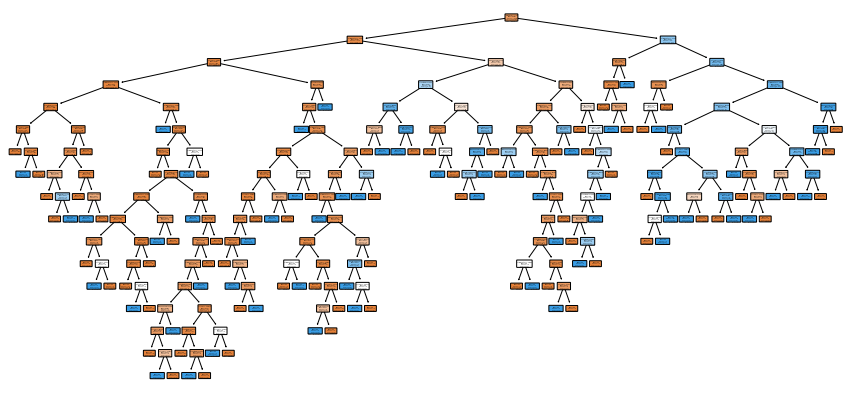

In [35]:


plt.figure(figsize=(15, 7))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['expensive','not expensive'], 
    feature_names=X_train.columns
    );

In [36]:
from sklearn.metrics import plot_confusion_matrix

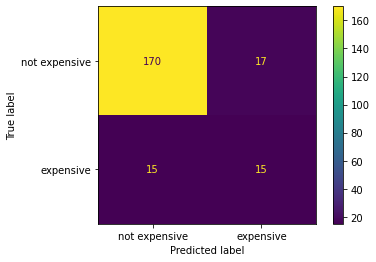

In [37]:
plot_confusion_matrix(tree, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [38]:
from sklearn.metrics import accuracy_score

In [39]:

preds = tree.predict(X_train)
accuracy_score(preds, y_train)

1.0

In [40]:
preds = tree.predict(X_test)
acc_2nd=accuracy_score(preds, y_test)
acc_2nd

0.8525345622119815

<h2>3rd ITERATION - DECISION TREE MODEL- Numerical features/Categorical features</h2>

In [41]:
house= pd.read_csv("housing-classification-iter6.csv")

In [42]:
house=house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','Expensive','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]

In [43]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [44]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,PoolArea,GarageCars,MSZoning,Condition1,HeatingQC,Street,CentralAir,Utilities,Neighborhood,OverallCond
1008,12118,43.0,1710,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Mitchel,5
60,13072,63.0,1158,3,0,2,RL,RRAe,Ex,Pave,Y,AllPub,SawyerW,5
671,6629,54.0,672,3,0,1,RH,Artery,TA,Pave,N,AllPub,Edwards,6
822,12394,NaN,847,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Gilbert,5
1254,6931,60.0,746,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Edwards,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,5310,59.0,485,2,0,1,RM,Feedr,Gd,Pave,Y,AllPub,OldTown,8
133,6853,NaN,1267,2,0,2,RL,Norm,Ex,Pave,Y,AllPub,Timber,5
361,9144,NaN,883,3,0,1,RL,Norm,Gd,Pave,Y,AllPub,BrkSide,5
1364,3180,30.0,600,2,0,2,FV,Norm,Ex,Pave,Y,AllPub,Somerst,5


Encoding categorical values

In [45]:
from sklearn.preprocessing import OrdinalEncoder


In [46]:
enc = OrdinalEncoder()

In [47]:
X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.fit_transform(X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])

In [48]:
X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.transform(X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])

In [49]:
X_train.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea',
       'GarageCars', 'MSZoning', 'Condition1', 'HeatingQC', 'Street',
       'CentralAir', 'Utilities', 'Neighborhood', 'OverallCond'],
      dtype='object')

In [50]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,PoolArea,GarageCars,MSZoning,Condition1,HeatingQC,Street,CentralAir,Utilities,Neighborhood,OverallCond
1008,12118,43.0,1710,3,0,2,3.0,2.0,0.0,1.0,1.0,0.0,11.0,5
60,13072,63.0,1158,3,0,2,3.0,5.0,0.0,1.0,1.0,0.0,20.0,5
671,6629,54.0,672,3,0,1,2.0,0.0,4.0,1.0,0.0,0.0,7.0,6
822,12394,NaN,847,3,0,2,3.0,2.0,0.0,1.0,1.0,0.0,8.0,5
1254,6931,60.0,746,3,0,2,3.0,2.0,0.0,1.0,1.0,0.0,7.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,5310,59.0,485,2,0,1,4.0,1.0,2.0,1.0,1.0,0.0,17.0,8
133,6853,NaN,1267,2,0,2,3.0,2.0,0.0,1.0,1.0,0.0,23.0,5
361,9144,NaN,883,3,0,1,3.0,2.0,2.0,1.0,1.0,0.0,3.0,5
1364,3180,30.0,600,2,0,2,1.0,2.0,0.0,1.0,1.0,0.0,21.0,5


In [51]:
num_col= ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars','OverallCond']

imp_num = SimpleImputer(strategy="median")

X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.transform(X_test[num_col])
X_train.isna().sum()

LotArea         0
LotFrontage     0
TotalBsmtSF     0
BedroomAbvGr    0
PoolArea        0
GarageCars      0
MSZoning        0
Condition1      0
HeatingQC       0
Street          0
CentralAir      0
Utilities       0
Neighborhood    0
OverallCond     0
dtype: int64

In [52]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

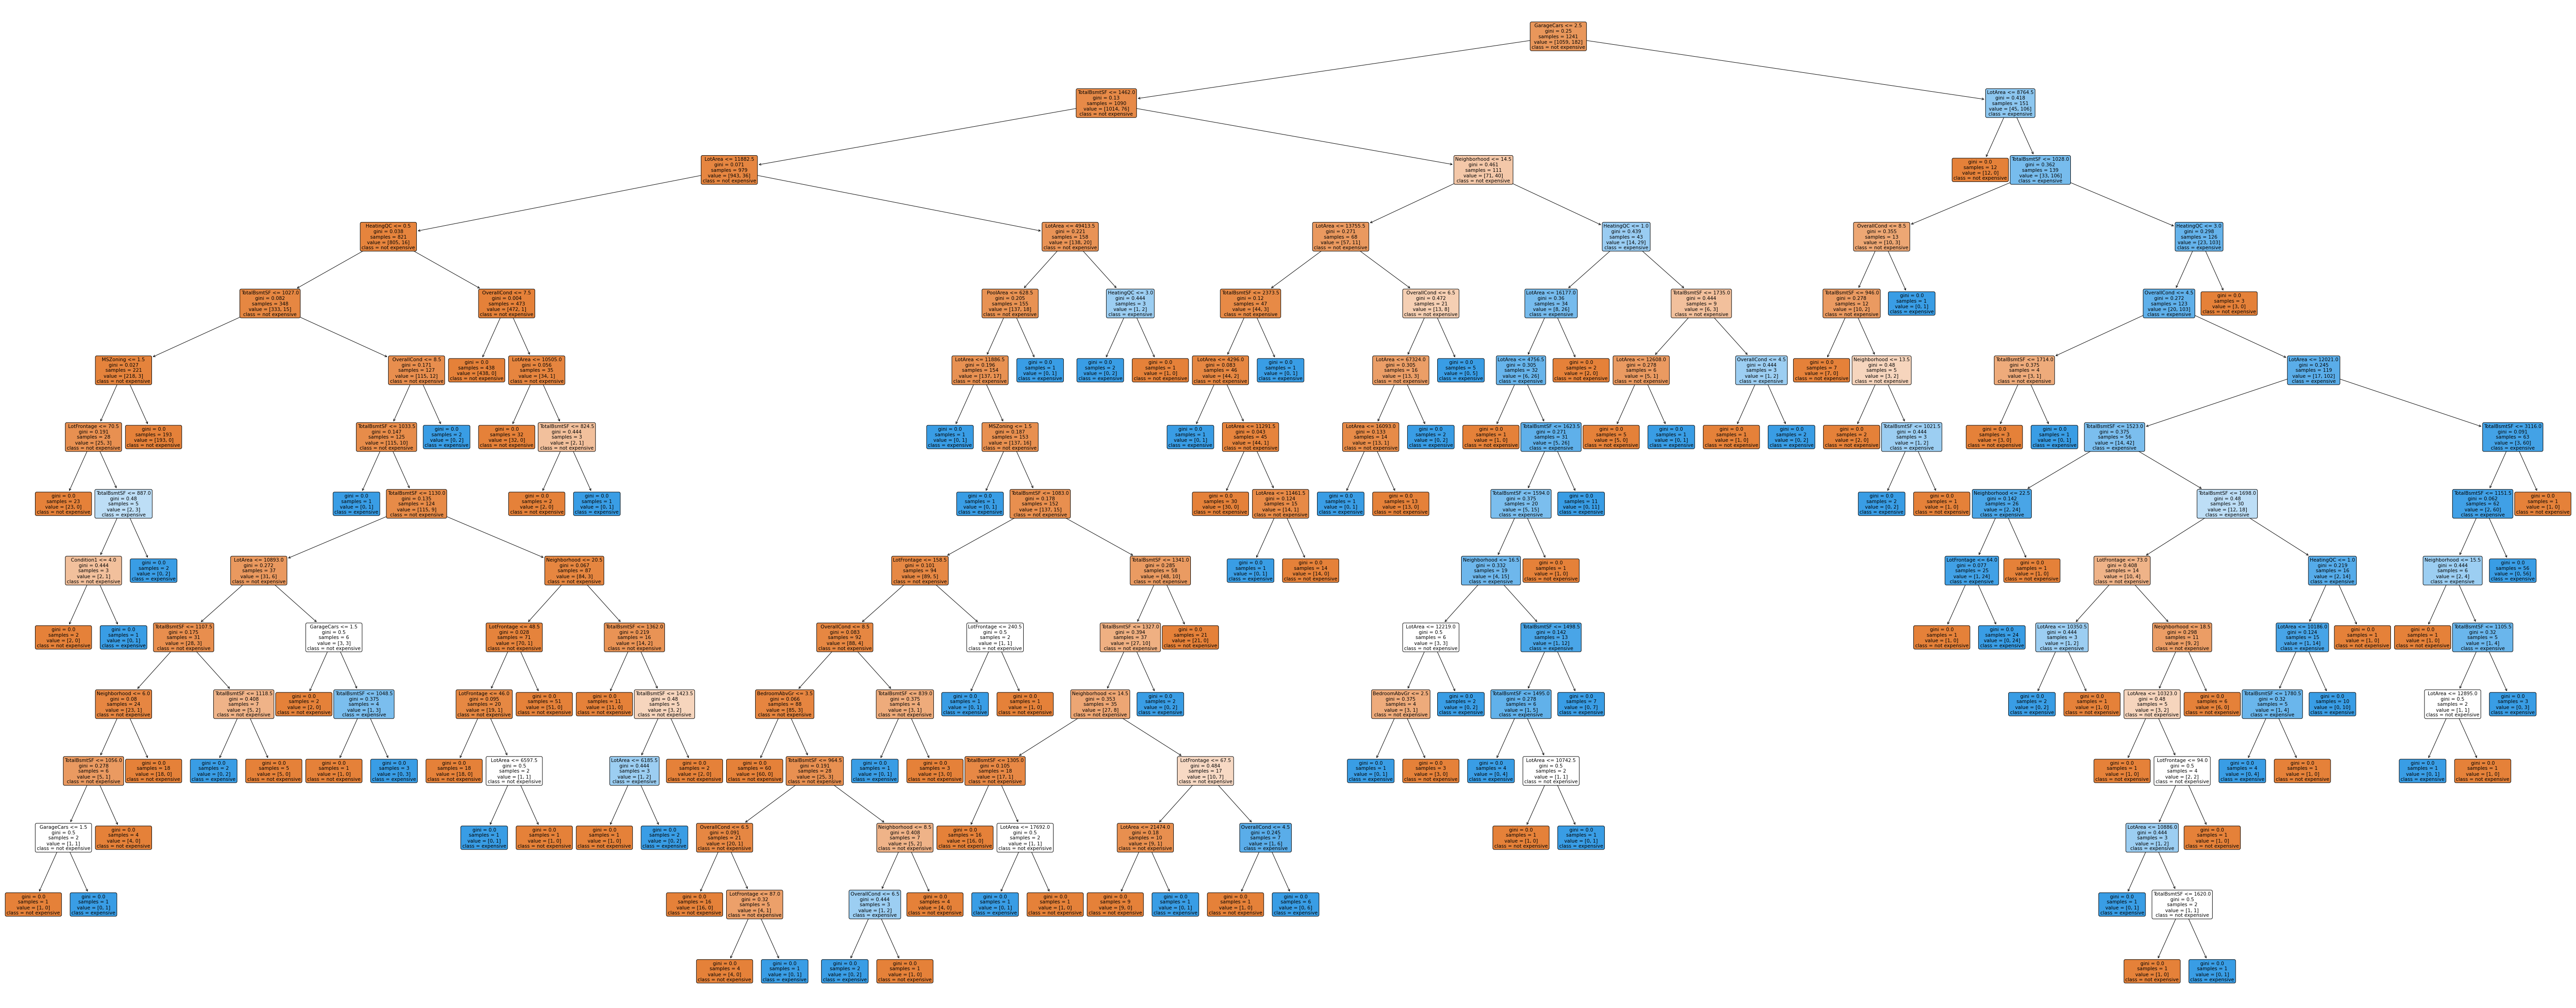

In [53]:
plt.figure(figsize=(100, 40))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['not expensive', 'expensive'], 
    feature_names=X_train.columns
    );

In [54]:
preds = tree.predict(X_train)
accuracy_score(preds, y_train)

1.0

In [55]:
preds = tree.predict(X_test)
acc_3rd = accuracy_score(preds, y_test)
acc_3rd

0.8767123287671232

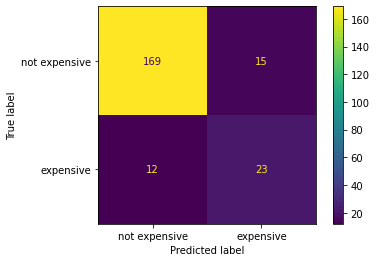

In [56]:
plot_confusion_matrix(tree, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [ ]:
print(f"""
    Accuracy: {accuracy_score(tree.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(tree.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(tree.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(tree.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(tree.predict(X_test), y_test)}
""")

<h2>4rd ITERATION- Prunning the tree</h2>

In [152]:
#Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical 
#and redundant to classify instances.

In [ ]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
plt.figure(figsize=(15, 7))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['expensive','not expensive'], 
    feature_names=X_train.columns
    );

In [58]:
preds = tree.predict(X_train)
accuracy_score(preds, y_train)

1.0

In [59]:
preds = tree.predict(X_test)
acc_4th = accuracy_score(preds, y_test)
acc_4th

0.8767123287671232

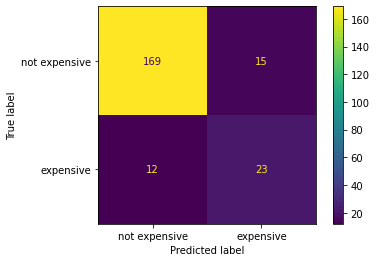

In [60]:
plot_confusion_matrix(tree, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [61]:
def model_check(y_true, y_preds, model):     
    print('Accuracy: ', accuracy_score(y_true, y_preds))   
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()
    plot_confusion_matrix(tree, X_test, y_test, display_labels=['not expensive', 'expensive']);
    return tn, fp, fn, tp


In [151]:
tn, fp, fn, tp = model_check(y_test, tree.predict(X_test), tree)

Accuracy:  0.8767123287671232


/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [63]:
from sklearn.metrics import plot_confusion_matrix

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
from sklearn.metrics import precision_score, recall_score, cohen_kappa_score, f1_score

In [ ]:
from sklearn.metrics import precision_score, recall_score, cohen_kappa_score, f1_score
print(f"""
    Accuracy: {accuracy_score(tree.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(tree.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(tree.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(tree.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(tree.predict(X_test), y_test)}
""")

<h2>5th ITERATION- pipeline</h2>

In [67]:
#A machine learning pipeline is a way to codify and automate the workflow it takes to produce a machine learning model. 
#Machine learning pipelines consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

In [68]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [70]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder())
])

In [71]:
from sklearn.compose import ColumnTransformer

In [72]:
num_col = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars', 'OverallCond']
cat_col = ['MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities', 'Neighborhood']

In [73]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,PoolArea,GarageCars,MSZoning,Condition1,HeatingQC,Street,CentralAir,Utilities,Neighborhood,OverallCond
1008,12118,43.0,1710,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Mitchel,5
60,13072,63.0,1158,3,0,2,RL,RRAe,Ex,Pave,Y,AllPub,SawyerW,5
671,6629,54.0,672,3,0,1,RH,Artery,TA,Pave,N,AllPub,Edwards,6
822,12394,NaN,847,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Gilbert,5
1254,6931,60.0,746,3,0,2,RL,Norm,Ex,Pave,Y,AllPub,Edwards,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,5310,59.0,485,2,0,1,RM,Feedr,Gd,Pave,Y,AllPub,OldTown,8
133,6853,NaN,1267,2,0,2,RL,Norm,Ex,Pave,Y,AllPub,Timber,5
361,9144,NaN,883,3,0,1,RL,Norm,Gd,Pave,Y,AllPub,BrkSide,5
1364,3180,30.0,600,2,0,2,FV,Norm,Ex,Pave,Y,AllPub,Somerst,5


In [74]:
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

pd.DataFrame(full_processor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.049778,0.075342,0.279869,0.375,0.0,0.50,0.500,3.0,2.0,0.0,1.0,1.0,0.0,11.0
1,0.054241,0.143836,0.189525,0.375,0.0,0.50,0.500,3.0,5.0,0.0,1.0,1.0,0.0,20.0
2,0.024101,0.113014,0.109984,0.375,0.0,0.25,0.625,2.0,0.0,4.0,1.0,0.0,0.0,7.0
3,0.051069,0.164384,0.138625,0.375,0.0,0.50,0.500,3.0,2.0,0.0,1.0,1.0,0.0,8.0
4,0.025514,0.133562,0.122095,0.375,0.0,0.50,0.500,3.0,2.0,0.0,1.0,1.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,0.017931,0.130137,0.079378,0.250,0.0,0.25,0.875,4.0,1.0,2.0,1.0,1.0,0.0,17.0
1237,0.025149,0.164384,0.207365,0.250,0.0,0.50,0.500,3.0,2.0,0.0,1.0,1.0,0.0,23.0
1238,0.035866,0.164384,0.144517,0.375,0.0,0.25,0.500,3.0,2.0,2.0,1.0,1.0,0.0,3.0
1239,0.007967,0.030822,0.098200,0.250,0.0,0.50,0.500,1.0,2.0,0.0,1.0,1.0,0.0,21.0


In [75]:
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier())
])
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['LotArea', 'LotFrontage',
                                                   'TotalBsmtSF',
                                                   'BedroomAbvGr', 'PoolArea',
                                                   'GarageCars',
                                                   'OverallCond']),
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleI

In [76]:
accuracy_score(tree_pipeline.predict(X_train), y_train)

1.0

In [77]:
preds = tree_pipeline.predict(X_test)
acc_5th = accuracy_score(preds, y_test)
acc_5th

0.8949771689497716

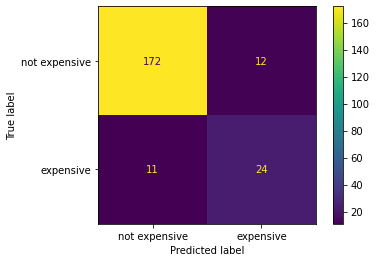

In [78]:
plot_confusion_matrix(tree_pipeline, X_test, y_test, display_labels=['not expensive', 'expensive']);

Accuracy:  0.8949771689497716


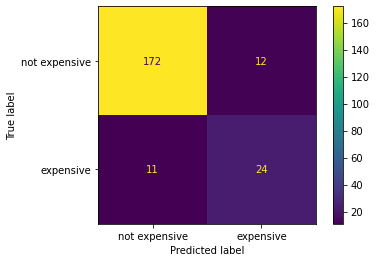

In [79]:
def model_check(y_true, y_preds, model):     
    print('Accuracy: ', accuracy_score(y_true, y_preds))
    classes = model.named_steps['model'].classes_    
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()
    plot_confusion_matrix(tree_pipeline, X_test, y_test, display_labels=['not expensive', 'expensive']);
    return tn, fp, fn, tp
tn, fp, fn, tp = model_check(y_test, tree_pipeline.predict(X_test), tree_pipeline)

In [80]:
print(f"""
    Accuracy: {accuracy_score(tree_pipeline.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(tree_pipeline.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(tree_pipeline.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(tree_pipeline.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(tree_pipeline.predict(X_test), y_test)}
""")


    Accuracy: 0.8949771689497716
    Recall/Sensitivity: 0.6666666666666666
    Precision (True Positive Rate): 0.6857142857142857
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.676056338028169
    Kappa: 0.6134008749712181



<h2>6th ITERATION- Manual model tunning</h2>

In [81]:
#Tuning is the process of maximizing a model's performance without overfitting or creating too high of a variance. 
#In machine learning, this is accomplished by selecting appropriate “hyperparameters.” 
#Choosing an appropriate set of hyperparameters is crucial for model accuracy, but can be computationally challenging.

In [82]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [83]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder())
])

num_col = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars', 'OverallCond']
cat_col = ['MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities', 'Neighborhood']

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier(max_depth=4))
])

In [84]:
tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.9363416599516519

In [85]:
preds = tree_pipeline.predict(X_test)
acc_6th = accuracy_score(preds, y_test)
acc_6th

0.8995433789954338

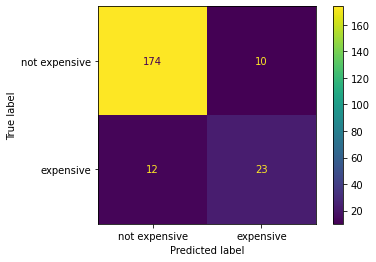

In [86]:
plot_confusion_matrix(tree_pipeline, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [87]:
print(f"""
    Accuracy: {accuracy_score(tree_pipeline.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(tree_pipeline.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(tree_pipeline.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(tree_pipeline.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(tree_pipeline.predict(X_test), y_test)}
""")


    Accuracy: 0.8995433789954338
    Recall/Sensitivity: 0.696969696969697
    Precision (True Positive Rate): 0.6571428571428571
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.676470588235294
    Kappa: 0.6170720076299476



In [153]:
X_train

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,PoolArea,GarageCars,MSZoning,Condition1,HeatingQC,Street,CentralAir,Utilities,Neighborhood,OverallCond
1008,12118.0,43.0,1710.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,11.0,5.0
60,13072.0,63.0,1158.0,3.0,0.0,2.0,3.0,5.0,0.0,1.0,1.0,0.0,20.0,5.0
671,6629.0,54.0,672.0,3.0,0.0,1.0,2.0,0.0,4.0,1.0,0.0,0.0,7.0,6.0
822,12394.0,69.0,847.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,8.0,5.0
1254,6931.0,60.0,746.0,3.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,5310.0,59.0,485.0,2.0,0.0,1.0,4.0,1.0,2.0,1.0,1.0,0.0,17.0,8.0
133,6853.0,69.0,1267.0,2.0,0.0,2.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,5.0
361,9144.0,69.0,883.0,3.0,0.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,3.0,5.0
1364,3180.0,30.0,600.0,2.0,0.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,21.0,5.0


<h2>7th ITERATION-Auto model tunning</h2>

In [88]:
#Grid Search cross-validation is a technique to select the best of the machine learning model, parameterized by a grid of hyperparameters. 
#Grid Search CV tries all combinations of parameters grid for a model and returns with the best set of parameters having the best performance score

In [89]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [90]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder())
])

num_col = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars', 'OverallCond']
cat_col = ['MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities', 'Neighborhood']

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier(max_depth=4))
])

In [91]:
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {
    'model__max_depth': range(1, 8),
    'model__min_samples_leaf': range(1, 10),
    'model__min_samples_split': range(2, 10),
    'model__criterion':['gini','entropy']
    }
search = GridSearchCV(tree_pipeline, param_grid, cv=15, scoring='accuracy', verbose=1, refit=True, n_jobs=-1)

In [95]:
search.fit(X_train, y_train)

Fitting 15 folds for each of 1008 candidates, totalling 15120 fits


/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


GridSearchCV(cv=15,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('number',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['LotArea',
                                                                          'LotFrontage',
                                                                          'TotalBsmtSF',
                                                                          'BedroomAbvGr',
                                                         

In [96]:
search.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 1,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [97]:
accuracy_score(search.predict(X_train), y_train)

0.9024979854955681

In [98]:
acc_7th = accuracy_score(search.predict(X_test), y_test)
acc_7th

0.8904109589041096

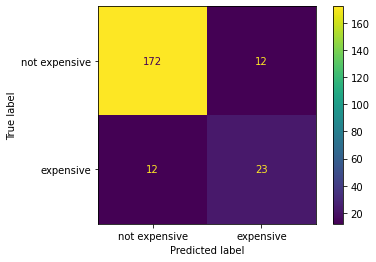

In [99]:
plot_confusion_matrix(search, X_test, y_test, display_labels=['not expensive', 'expensive']);

Accuracy:  0.8904109589041096


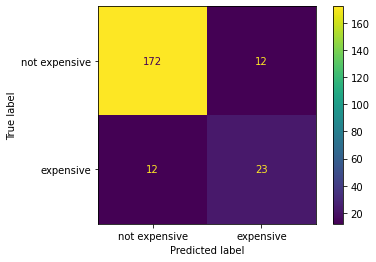

In [100]:
def model_check(y_true, y_preds, model):     
    print('Accuracy: ', accuracy_score(y_true, y_preds))
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()
    plot_confusion_matrix(search, X_test, y_test, display_labels=['not expensive', 'expensive']);
    return tn, fp, fn, tp
tn, fp, fn, tp = model_check(y_test,search.predict(X_test), search)

In [101]:
print(f"""
    Accuracy: {accuracy_score(search.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(search.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(search.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(search.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(search.predict(X_test), y_test)}
""")


    Accuracy: 0.8904109589041096
    Recall/Sensitivity: 0.6571428571428571
    Precision (True Positive Rate): 0.6571428571428571
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.6571428571428571
    Kappa: 0.5919254658385094



<h2>8th ITERATION-feature selection</h2>

In [102]:
#Feature selection is the process of reducing the number of input variables when developing a predictive model. 
#Filter-based feature selection methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features

In [103]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ordinal',OrdinalEncoder())
])

num_col = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars', 'OverallCond']
cat_col = ['MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities', 'Neighborhood']

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

param_grid = {'model__criterion': 'gini',
 'model__max_depth': 1,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2}

In [104]:
from sklearn.feature_selection import SelectFromModel

In [105]:
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())),
    ('model', DecisionTreeClassifier(criterion='gini'))#da rivedere dopo
])

In [106]:
tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

1.0

In [107]:
acc_8th = accuracy_score(tree_pipeline.predict(X_test), y_test)
acc_8th

0.8584474885844748

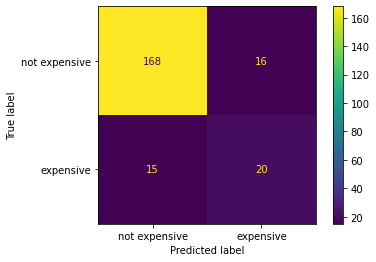

In [108]:
plot_confusion_matrix(tree_pipeline, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [109]:
print(f"""
    Accuracy: {accuracy_score(tree_pipeline.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(tree_pipeline.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(tree_pipeline.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(tree_pipeline.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(tree_pipeline.predict(X_test), y_test)}
""")


    Accuracy: 0.8584474885844748
    Recall/Sensitivity: 0.5555555555555556
    Precision (True Positive Rate): 0.5714285714285714
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.5633802816901409
    Kappa: 0.47893161409164176



<h2>9th ITERATION-KNN </h2>

In [110]:
#A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates 
#how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())),
    ('model', KNeighborsClassifier())
])

In [113]:
param_grid = {
    'model__n_neighbors': range(1, 10),
    'model__weights': ['uniform', 'distance'],
    'model__p': [1,2]
    }
search = GridSearchCV(
    knn_pipeline, 
    param_grid,
    cv=15, 
    scoring='accuracy',
    verbose=1,
    refit=True, 
    n_jobs=-1
    )

In [114]:
search.fit(X_train, y_train)
accuracy_score(search.predict(X_train), y_train)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


1.0

In [115]:
acc_9th = accuracy_score(search.predict(X_test), y_test)
acc_9th

0.8858447488584474

In [116]:
print(f"""
    Accuracy: {accuracy_score(search.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(search.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(search.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(search.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(search.predict(X_test), y_test)}
""")


    Accuracy: 0.8858447488584474
    Recall/Sensitivity: 0.6388888888888888
    Precision (True Positive Rate): 0.6571428571428571
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.647887323943662
    Kappa: 0.5797835597513239



<h2>10th ITERATION-LOGISTIC REGRESSION </h2>

In [117]:
#Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. 
# Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [120]:
enc = OrdinalEncoder()

In [121]:
X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.fit_transform(X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])
X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.transform(X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])

In [122]:
num_col= ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars','OverallCond']

imp_num = SimpleImputer(strategy="median")

X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.transform(X_test[num_col])

In [123]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/sabrinamarano/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
accuracy_score(logreg.predict(X_train), y_train)

0.8702659145850121

In [125]:
acc_10th = accuracy_score(logreg.predict(X_test), y_test)
acc_10th

0.8584474885844748

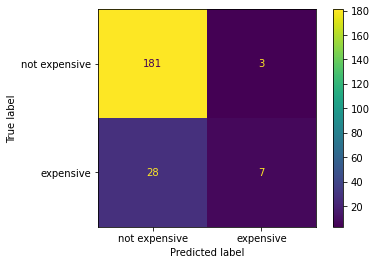

In [126]:
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [127]:
print(f"""
    Accuracy: {accuracy_score(logreg.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(logreg.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(logreg.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(logreg.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(logreg.predict(X_test), y_test)}
""")


    Accuracy: 0.8584474885844748
    Recall/Sensitivity: 0.7
    Precision (True Positive Rate): 0.2
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.3111111111111111
    Kappa: 0.25843801201529215



<h2>11th ITERATION-SUPPORT VECTOR MACHINES</h2>

In [128]:
#A support vector machine (SVM) is a type of deep learning algorithm that performs supervised learning for classification or regression of data groups. 
#The classification provides a learning basis for future data processing. Support vector machines are used to sort two data groups by like classification.

In [129]:
from sklearn.svm import SVC

In [130]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [131]:
enc = OrdinalEncoder()
X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.fit_transform(X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])
X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.transform(X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])

num_col= ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars','OverallCond']

imp_num = SimpleImputer(strategy="median")

X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.transform(X_test[num_col])


In [132]:
svc = SVC(C=1.0, random_state=8, kernel='linear')

In [133]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=8)

In [134]:
accuracy_score(svc.predict(X_train), y_train)

0.9024979854955681

In [135]:
acc_11th = accuracy_score(svc.predict(X_test), y_test)
acc_11th

0.8721461187214612

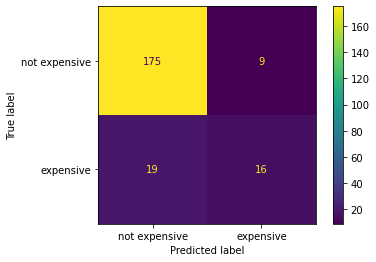

In [136]:
plot_confusion_matrix(svc, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [137]:
print(f"""
    Accuracy: {accuracy_score(svc.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(svc.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(svc.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(svc.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(svc.predict(X_test), y_test)}
""")


    Accuracy: 0.8721461187214612
    Recall/Sensitivity: 0.64
    Precision (True Positive Rate): 0.45714285714285713
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.5333333333333333
    Kappa: 0.46163301141352064



<h2>12th ITERATION-Robust forest</h2>

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
X = house[['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea', 'GarageCars','MSZoning', 'Condition1', 'HeatingQC','Street', 'CentralAir','Utilities','Neighborhood','OverallCond']]
y = house['Expensive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [140]:
enc = OrdinalEncoder()
X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.fit_transform(X_train[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])
X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']]= enc.transform(X_test[['MSZoning','Condition1', 'HeatingQC','Street','CentralAir','Utilities','Neighborhood']])

num_col= ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'PoolArea','GarageCars','OverallCond']

imp_num = SimpleImputer(strategy="median")

X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.transform(X_test[num_col])

In [142]:
clf = RandomForestClassifier(max_depth=2, random_state=8)

In [143]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=8)

In [144]:
accuracy_score(clf.predict(X_train), y_train)

0.9016921837228042

In [145]:
acc_12th = accuracy_score(clf.predict(X_test), y_test)
acc_12th

0.8767123287671232

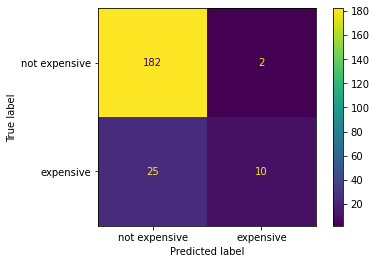

In [146]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['not expensive', 'expensive']);

In [147]:
print(f"""
    Accuracy: {accuracy_score(clf.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(clf.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(clf.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(clf.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(clf.predict(X_test), y_test)}
""")


    Accuracy: 0.8767123287671232
    Recall/Sensitivity: 0.8333333333333334
    Precision (True Positive Rate): 0.2857142857142857
    Specifity (False Positive Rate): 0.9347826086956522
    F Score: 0.42553191489361697
    Kappa: 0.3744842907013646



In [148]:
#Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
#Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.High precision relates to the low false positive rate. 
#Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. which is good for this model as it’s above 0.5.
#F1 Score is the weighted average of Precision and Recall. 

<h2>VISUALIZE ACCURANCY EVOLUTION</h2>

In [149]:
import seaborn as sns

Text(0.5, 1.0, 'Accuracy evolution through iterations')

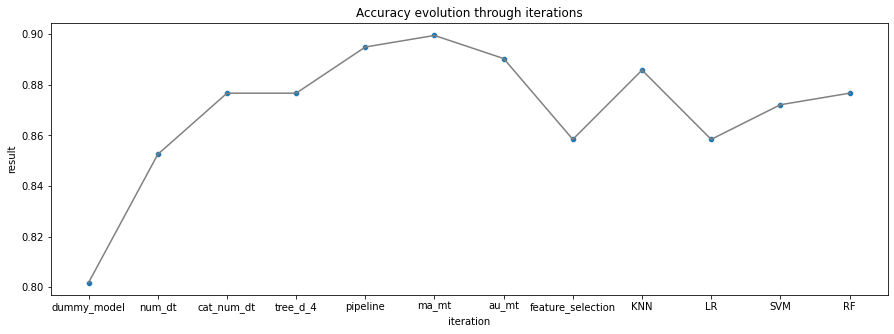

In [158]:
plt.subplots(figsize=(15, 5))

results = pd.DataFrame({
    'iteration':['dummy_model', 'num_dt', 'cat_num_dt', 'tree_d_4','pipeline','ma_mt','au_mt', 'feature_selection', 'KNN','LR','SVM','RF'],
    'result':[acc_1st,acc_2nd, acc_3rd, acc_4th, acc_5th, acc_6th,acc_7th, acc_8th, acc_9th, acc_10th, acc_11th, acc_12th]
})
sns.lineplot(data=results, x='iteration', y='result', color='grey')
sns.scatterplot(data=results, x='iteration', y='result')
plt.title('Accuracy evolution through iterations')